## 1.1 Load Libraries <a id=2.1></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

## 1.2 Load Dataset <a id=2.2></a>

In [4]:

df = pd.read_csv(r"E:\Projects\Titanic\data.csv")


## 2.1 Info About Data <a id=3.1></a>

In [68]:
df.head()

,PassengerId,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,2.0,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3.0,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,4.0,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,5.0,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   float64
 1   pclass       1309 non-null   float64
 2   survived     1309 non-null   float64
 3   name         1309 non-null   object 
 4   sex          1309 non-null   object 
 5   age          1046 non-null   float64
 6   sibsp        1309 non-null   float64
 7   parch        1309 non-null   float64
 8   ticket       1309 non-null   object 
 9   fare         1308 non-null   float64
 10  cabin        295 non-null    object 
 11  embarked     1307 non-null   object 
 12  boat         486 non-null    object 
 13  body         121 non-null    float64
 14  home.dest    745 non-null    object 
dtypes: float64(8), object(7)
memory usage: 153.6+ KB


In [109]:
df.columns

Index(['PassengerId', 'pclass', 'survived', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body',
       'home.dest'],
      dtype='object')

In [110]:
df.duplicated().sum()

0

### 2.2 Analysis Output <a id=3.1.1></a>


- **Number of Rows**: 1310
- **Number of Columns**: 15


## 2.3 Missing Values <a id=3.2></a>

In [5]:
df.isna().sum()

PassengerId       1
pclass            1
survived          1
name              1
sex               1
age             264
sibsp             1
parch             1
ticket            1
fare              2
cabin          1015
embarked          3
boat            824
body           1189
home.dest       565
dtype: int64

### 2.4 Missing Value Output  <a id=3.2.1></a>
- **age**: 264 missing values
- **fare**: 2 missing values
- **embarked**: 3 missing values
- **boat**: 824 missing values

## 2.5 Unique Values <a id=3.3></a>

In [114]:
pd.DataFrame(df.nunique(), columns=['Unique Values'])

,Unique Values
PassengerId,1309
pclass,3
survived,2
name,1307
sex,2
age,98
sibsp,7
parch,8
ticket,929
fare,281


## 3.1 delete unwanted cols


In [78]:
df.drop(columns=['body', 'home.dest', 'cabin', 'PassengerId', 'ticket'], axis=1, inplace=True)

In [ ]:
df.head(2)

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,boat
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,211.3375,S,2
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,151.5500,S,11


# 5. Data Cleaning <a id=4></a>

## 5.1 process nan <a id=4.1></a>

In [80]:
df.dropna(how='all', inplace=True)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   float64
 1   survived  1309 non-null   float64
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   float64
 6   parch     1309 non-null   float64
 7   fare      1308 non-null   float64
 8   embarked  1307 non-null   object 
 9   boat      486 non-null    object 
dtypes: float64(6), object(4)
memory usage: 112.5+ KB


## 5.2 Age Variable's Missing Values <a id=4.2></a>

In [81]:
age_mean_df = df.groupby(['pclass'])['age'].mean().reset_index()
age_mean_df

,pclass,age
0,1.0,39.159918
1,2.0,29.506705
2,3.0,24.816367


In [82]:
age_map = {1: 39, 2: 29, 3: 24}

df['age'] = df['age'].fillna(df['pclass'].map(age_map))


## 5.3 Fare Variable's Missing Values <a id=4.3></a>



In [83]:
df.dropna(subset = ['fare'], inplace = True)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1308 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1308 non-null   float64
 1   survived  1308 non-null   float64
 2   name      1308 non-null   object 
 3   sex       1308 non-null   object 
 4   age       1308 non-null   float64
 5   sibsp     1308 non-null   float64
 6   parch     1308 non-null   float64
 7   fare      1308 non-null   float64
 8   embarked  1306 non-null   object 
 9   boat      486 non-null    object 
dtypes: float64(6), object(4)
memory usage: 112.4+ KB


In [84]:
df.fillna(value={'embarked': df['embarked'].mode()[0]}, inplace= True)

In [85]:
condition = (df['survived'] == 1) & (df['boat'].isnull())

boat_mode = df['boat'].mode()[0]

df.loc[condition, 'boat'] = boat_mode

In [ ]:
boat_mode_by_class_sex = df.groupby(['pclass', 'sex'])['boat'].transform(lambda x: x.mode()[0])
df['boat'].fillna(boat_mode_by_class_sex, inplace=True)

C:\Users\Mohamed\AppData\Local\Temp\ipykernel_10940\484163559.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [87]:
df[['last_name', 'title', 'first_name', 'middle_name']] = df['name'].str.split(r', |\.', expand=True)
df.drop(columns=['name', 'middle_name'], inplace=True)


In [69]:
df.head()

,PassengerId,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,2.0,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3.0,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,4.0,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,5.0,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## 6 Converting Data Types

In [88]:
def dtype(col, dtype=int):
    df[col] = pd.to_numeric(df[col])
    df[col] = df[col].astype(dtype)

In [89]:
dtype('pclass')

In [90]:
dtype('survived')

In [91]:
dtype('age')

In [30]:
dtype('sibsp')

In [31]:
dtype('parch')

In [32]:
dtype('fare', dtype=float)

# 7. EDA

## 7.1 Survived Passenger

In [ ]:
fig = px.histogram(
    df, 
    x="survived", 
    color="survived", 
    barmode="group",
    text_auto=True, 
    color_discrete_sequence=px.colors.sequential.Viridis
)

fig.update_layout(
    title="Survival Distribution (0: No, 1: Yes)",
    xaxis_title="Survived",
    yaxis_title="Count",
    title_font=dict(size=20),
    xaxis=dict(title_font=dict(size=16)),
    yaxis=dict(title_font=dict(size=16))
)

fig.show()


In [ ]:

survival_counts = df['survived'].value_counts().reset_index()
survival_counts.columns = ['survived', 'count']

labels_map = {0: "Not Survived", 1: "Survived"}
survival_counts['survived'] = survival_counts['survived'].map(labels_map)

fig = px.pie(
    survival_counts, 
    values='count', 
    names='survived', 
    color='survived',
    color_discrete_map={"Not Survived": "#ff9999", "Survived": "#66b3ff"},
    title="Survival Distribution"
)

fig.update_traces(textinfo='percent+label')
fig.show()


### 7.2 Survived Passenger's By Sex <a id=5.2.1></a>

In [ ]:

fig = px.histogram(
    df,
    x="pclass",
    color="sex",
    barmode="group",  
    color_discrete_sequence=px.colors.sequential.Viridis
)

fig.update_layout(
    title="Passenger Class Distribution by Gender",
    xaxis_title="Passenger Class",
    yaxis_title="Count",
    plot_bgcolor="white"
)

fig.show()


### 7.3 Survived Passenger's By Class

In [ ]:

fig = px.histogram(
    df,
    x="pclass",
    color="pclass",
    barmode="group",  
    color_discrete_sequence=px.colors.sequential.Viridis
)

fig.update_layout(
    title="Passenger Class Distribution by Gender",
    xaxis_title="Passenger Class",
    yaxis_title="Count",
    plot_bgcolor="white"
)

fig.show()


## 7.4  Passenger Per pclass <a id=5.2></a>

In [ ]:

fig = px.histogram(
    df, 
    x="pclass", 
    color="pclass", 
    title="Passenger Class Distribution",
    labels={"pclass": "Class", "count": "Count"},
    color_discrete_sequence=px.colors.sequential.Viridis
)

fig.update_layout(
    title_font=dict(size=22, family="Arial", color="black"),
    xaxis_title_font=dict(size=16, family="Arial"),
    yaxis_title_font=dict(size=16, family="Arial"),
    bargap=0.2,
    template="plotly_white"
)

fig.show()


In [ ]:
class_counts = df['pclass'].value_counts()

fig = px.pie(
    names=class_counts.index,
    values=class_counts.values,
    title="Passenger Class Distribution",
    color=class_counts.index,  
    color_discrete_sequence=px.colors.sequential.Viridis
)

fig.update_traces(textinfo='percent+label', pull=[0.05, 0.05, 0.05])  
fig.update_layout(
    title_font=dict(size=22, family="Arial", color="darkblue"),
    legend_title="Class",
    legend=dict(font=dict(size=14))
)

fig.show()


## 7.5 Passengers By Sex <a id=5.3></a>

In [ ]:

fig = px.histogram(
    df, 
    x="sex", 
    color="sex", 
    text_auto=True,  
    title="Passenger Count by Gender",
    color_discrete_sequence=px.colors.sequential.Viridis 
)

fig.update_layout(
    xaxis_title="Gender",
    yaxis_title="Count",
    title_font=dict(size=20, family="Arial", color="black"),
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=True, gridcolor="lightgray"),
    bargap=0.3
)

fig.show()



## 7.6 Passenger by Embarkation Port <a id=5.4></a>

In [ ]:

fig = px.histogram(
    df, 
    x="embarked", 
    color="embarked", 
    title="Passenger Count by Embarkation Port",
    labels={"embarked": "Embarkation Port", "count": "Passenger Count"},
    color_discrete_sequence=px.colors.sequential.Viridis 

fig.update_layout(
    bargap=0.3,
    title_font=dict(size=20, family="Arial", color="black"),
    xaxis=dict(title="Embarkation Port"),
    yaxis=dict(title="Count")
)

fig.show()


## 7.7 Passenger Count by Siblings/Spouses Aboard <a id=5.5></a>

In [105]:

fig = px.histogram(df, x='sibsp', color='sibsp',
                   title='Passenger Count by Siblings/Spouses Aboard',
                   labels={'sibsp': 'Number of Siblings/Spouses Aboard', 'count': 'Passenger Count'},
                   color_discrete_sequence=px.colors.qualitative.Set2)

fig.update_layout(
    xaxis_title="Number of Siblings/Spouses Aboard",
    yaxis_title="Count",
    bargap=0.2
)

fig.show()


## 7.8 Number Of Passenger Within Life-Boats <a id=5.6></a>

In [ ]:

fig = px.histogram(
    df, 
    x="boat", 
    color="boat",  
    title="Passenger Count by Assigned Boat",
)

fig.update_layout(
    xaxis_title="Assigned Boat",
    yaxis_title="Count",
    xaxis=dict(tickangle=45),  
    bargap=0.2,
    template="plotly_white"
)

fig.show()


## 7.9 Boxplot For Age Variable <a id=5.7></a>

In [49]:
import plotly.express as px

fig = px.box(df, x="pclass", y="age",
             title="Age Distribution by Passenger Class",
             labels={"pclass": "Passenger Class", "age": "Age"},
             points="all")  # بيعرض النقاط فوق البوكس
fig.show()


## 7.10 Age Distribution <a id=5.8></a>

<Figure size 1000x600 with 0 Axes>

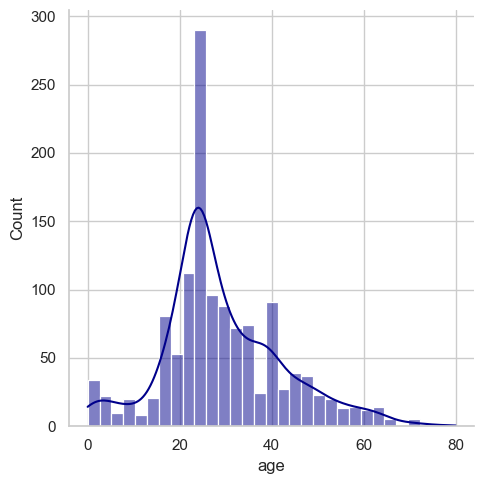

In [149]:
plt.figure(figsize=(10, 6))
sns.displot(df['age'], color='darkblue', kde=True)
plt.show()

## 5.11 Fare Distribution <a id=5.9></a>

<Figure size 1000x600 with 0 Axes>

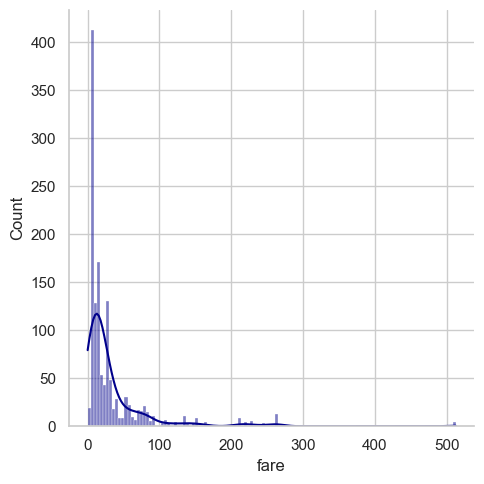

In [150]:
plt.figure(figsize=(10, 6))
sns.displot(df['fare'], color='darkblue', kde=True)
plt.show()

# 8. Correlation Heatmap <a id=6></a>

In [50]:
import plotly.express as px

corr = df.corr(numeric_only=True)

fig = px.imshow(corr,
                text_auto=True,   # يكتب القيم جوه المربعات
                aspect="auto",
                color_continuous_scale="RdBu_r",
                title="Correlation Heatmap")
fig.show()


# 9 One-Hot Encoding <a id=7></a>

In [61]:
df.head()

,pclass,survived,age,sibsp,parch,fare,boat,last_name,title,first_name
0,1,1,29,0,0,211.3375,2,Allen,Miss,Elisabeth Walton
1,1,1,0,1,2,151.5500,11,Allison,Master,Hudson Trevor
2,1,0,2,1,2,151.5500,8,Allison,Miss,Helen Loraine
3,1,0,30,1,2,151.5500,3,Allison,Mr,Hudson Joshua Creighton
4,1,0,25,1,2,151.5500,8,Allison,Mrs,Hudson J C (Bessie Waldo Daniels)


In [ ]:
sex = pd.get_dummies(df['sex'], dtype=int)
embarked = pd.get_dummies(df['embarked'], dtype=int)

In [93]:
df = pd.concat([df, sex, embarked], axis=1)
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,boat,last_name,title,first_name,female,male,C,Q,S
0,1,1,female,29,0.0,0.0,211.3375,S,2,Allen,Miss,Elisabeth Walton,1,0,0,0,1
1,1,1,male,0,1.0,2.0,151.5500,S,11,Allison,Master,Hudson Trevor,0,1,0,0,1
2,1,0,female,2,1.0,2.0,151.5500,S,8,Allison,Miss,Helen Loraine,1,0,0,0,1
3,1,0,male,30,1.0,2.0,151.5500,S,3,Allison,Mr,Hudson Joshua Creighton,0,1,0,0,1
4,1,0,female,25,1.0,2.0,151.5500,S,8,Allison,Mrs,Hudson J C (Bessie Waldo Daniels),1,0,0,0,1


In [ ]:
df.drop(columns=['sex', 'embarked'], axis=1, inplace=True)

In [95]:
df.head(1)

,pclass,survived,age,sibsp,parch,fare,boat,last_name,title,first_name,female,male,C,Q,S
0,1,1,29,0.0,0.0,211.3375,2,Allen,Miss,Elisabeth Walton,1,0,0,0,1


# 10. Classification Model Using Logistic Regression <a id=8></a>

## 10.1 Choosing Variables For Modelling

In [96]:
df_model = df[['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'female', 'male', 'C', 'Q', 'S']].copy()
df_model.head()

,pclass,survived,age,sibsp,parch,fare,female,male,C,Q,S
0,1,1,29,0.0,0.0,211.3375,1,0,0,0,1
1,1,1,0,1.0,2.0,151.5500,0,1,0,0,1
2,1,0,2,1.0,2.0,151.5500,1,0,0,0,1
3,1,0,30,1.0,2.0,151.5500,0,1,0,0,1
4,1,0,25,1.0,2.0,151.5500,1,0,0,0,1


## 8.3 Simple Logistic Regression Modelling <a id=8.3></a>

In [ ]:
X = df_model.drop('survived', axis=1)
y = df_model['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

lr_model = LogisticRegression()

lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

c:\Users\Mohamed\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning:

lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



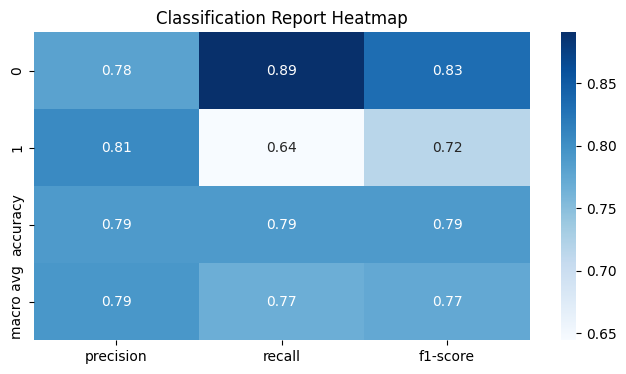

Detailed Classification Report:
              precision    recall  f1-score     support
0              0.780822  0.890625  0.832117  192.000000
1              0.805556  0.644444  0.716049  135.000000
accuracy       0.788991  0.788991  0.788991    0.788991
macro avg      0.793189  0.767535  0.774083  327.000000
weighted avg   0.791033  0.788991  0.784199  327.000000


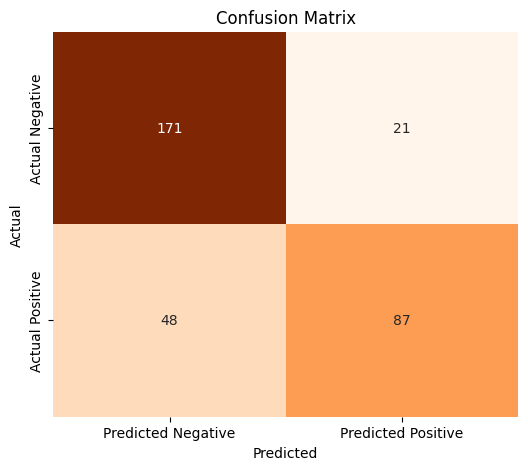

In [ ]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 4))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f")
plt.title("Classification Report Heatmap")
plt.show()

print("Detailed Classification Report:")
print(report_df)


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [100]:
cnf_matrix = confusion_matrix(y_test, y_pred)

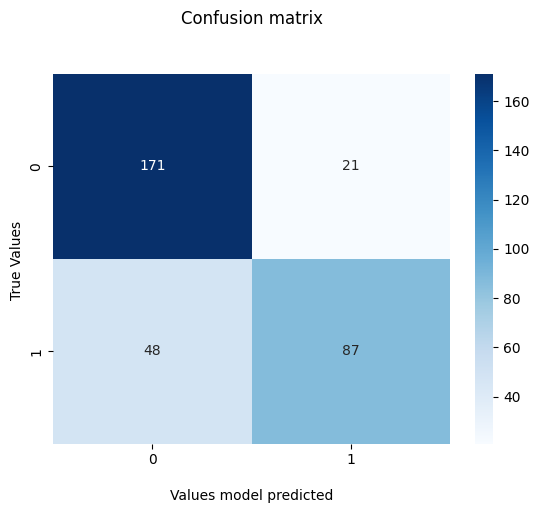

In [103]:
fx = sns.heatmap(cnf_matrix, annot=True, cmap="Blues", fmt="d")
fx.set_title("Confusion matrix\n\n");
fx.set_xlabel("\nValues model predicted")
fx.set_ylabel("True Values ")
plt.show()